In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import flare_prob

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [9]:
dur = 0.05 # duration to simulate (in years)
ffd_beta = -2.0 # ffd slope
ffd_min = -1

s_time1, s_flux1 = flare_prob.SuperLC(dur=dur, mag=False, ffd_alpha=1, ffd_beta=ffd_beta, 
                                      ffd_min=ffd_min, dt=0.1/24./60.)


Making 262800 epochs
Simulating 18250 flares


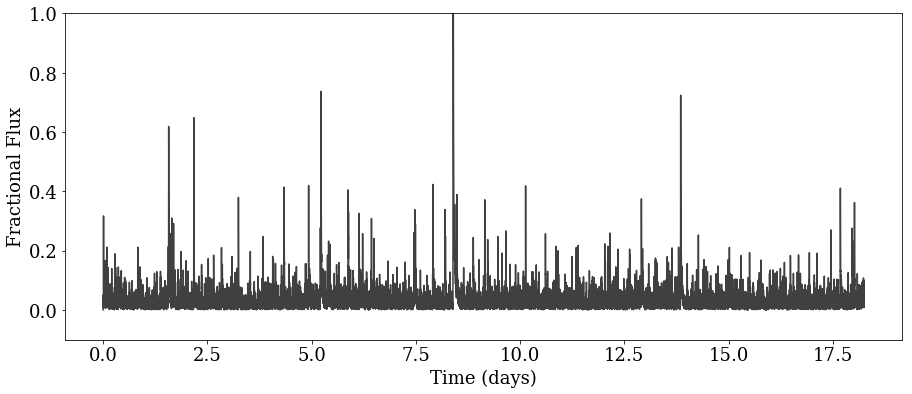

In [10]:
plt.figure(figsize=(15,6))
plt.plot(s_time1, s_flux1, alpha=0.75, c='black')
plt.ylim(-0.1,1)
plt.xlabel('Time (days)')
plt.ylabel('Fractional Flux')
plt.savefig('Fakeflares_try1.png', dpi=150, rasterized=True, bbox_inches='tight', pad_inches=0.5)

(0, 0.5)

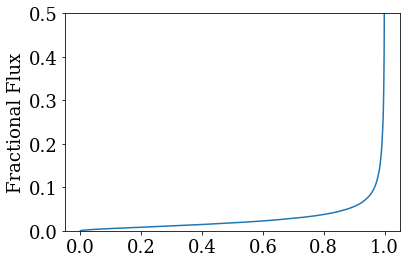

In [14]:
plt.plot(np.linspace(0,1,len(s_time1)), s_flux1[np.argsort(s_flux1)])
plt.ylabel('Fractional Flux')
plt.ylim(0,0.5)

In [18]:
from astropy.stats import lombscargle, LombScargle

In [19]:
frequency, power = LombScargle(s_time1, s_flux1).autopower()

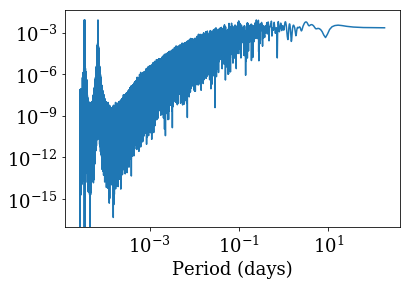

In [23]:
plt.plot(1./frequency, power)
plt.xscale('log')
plt.xlabel('Period (days)')
plt.yscale('log')